# Application: Exploring Handwritten Digits
To demonstrate these principles on a more interesting problem, let’s consider one
piece of the optical character recognition problem: the identification of handwritten
digits. In the wild, this problem involves both locating and identifying characters in
an image. Here we’ll take a shortcut and use Scikit-Learn’s set of preformatted digits,
which is built into the library

## Loading and visualizing the digits data

In [1]:

from sklearn.datasets import load_digits

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

**The images data is a three-dimensional array: 1,797 samples, each consisting of an
8×8 grid of pixels. Let’s visualize the first hundred of these**

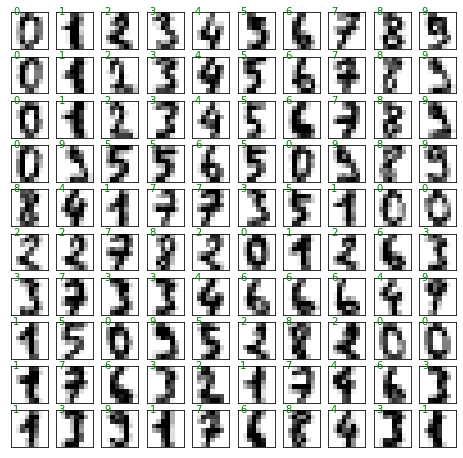

In [6]:
import matplotlib.pyplot as plt
fig, axes= plt.subplots(10,10, figsize=(8,8),
                     subplot_kw={'xticks':[],'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05, str(digits.target[i]),color='green')

**In order to work with this data within Scikit-Learn, we need a two-dimensional,`[n_samples, n_features]` representation. We can accomplish this by treating each
pixel in the image as a feature—that is, by flattening out the pixel arrays so that we
have a length-64 array of pixel values representing each digit. Additionally, we need
the target array, which gives the previously determined label for each digit. These two
quantities are built into the digits dataset under the data and target attributes,
respectively:**

In [9]:
X = digits.data
X.shape

(1797, 64)

In [10]:
y=digits.target
y.shape

(1797,)

**We see here that there are 1,797 samples and 64 features.**

### Unsupervised learning: Dimensionality reduction
We’d like to visualize our points within the 64-dimensional parameter space, but it’s
difficult to effectively visualize points in such a high-dimensional space. Instead we’ll
reduce the dimensions to 2, using an unsupervised method.

_Here we will use the manifold learning algorithm called **isomap**._

In [11]:
from sklearn.manifold import Isomap

In [12]:
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f491279a0d0>
Traceback (most recent call last):
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:328: UserWarning: The number 

(1797, 2)

**We see that the projected data is now two-dimensional. Let’s plot this data to see if we
can learn anything from its structure**

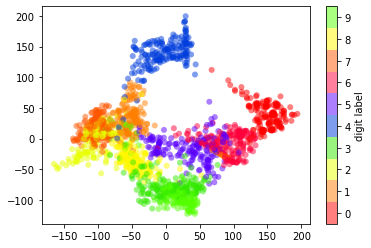

In [16]:
plt.scatter(data_projected[:,0],data_projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('prism',10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5)

**This plot gives us some good intuition into how well various numbers are separated
in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple)
have very little overlap in parameter space. Intuitively, this makes sense: a zero is
empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between
ones and fours: we can understand this by realizing that some people draw ones with
“hats” on them, which cause them to look similar to fours.  
Overall, however, the different groups appear to be fairly well separated in the param‐
eter space: this tells us that even a very straightforward supervised classification algo‐
rithm should perform suitably on this data**

### Classification on digits
Let’s apply a classification algorithm to the digits. As with the Iris data previously, we
will split the data into a training and test set, and fit a Gaussian naive Bayes model:

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, random_state=0)


In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

**Now that we have predicted our model, we can gauge its accuracy by comparing the
true values of the test set to the predictions:**

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(ytest, y_model)

0.8333333333333334

**With even this extremely simple model, we find about 80% accuracy for classification
of the digits! However, this single number doesn’t tell us where we’ve gone wrong—
one nice way to do this is to use the confusion matrix, which we can compute with
Scikit-Learn and plot with Seaborn**

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set_theme()

Text(89.18, 0.5, 'true value')

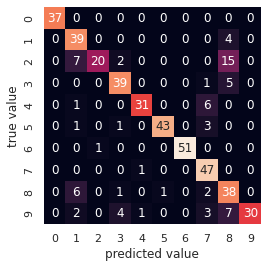

In [28]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

**This shows us where the mislabeled points tend to be: for example, a large number of
8s here are misclassified as either 2 or 9 or 3. Another way to gain intuition into
the characteristics of the model is to plot the inputs again, with their predicted labels.
We’ll use green for correct labels, and red for incorrect labels**

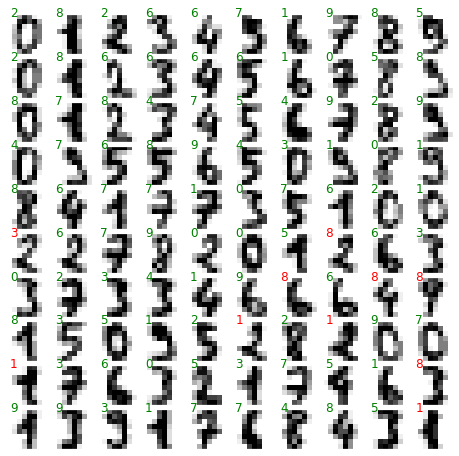

In [33]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
            color='green' if (ytest[i]==y_model[i])else 'red')

**Examining this subset of the data, we can gain insight regarding where the algorithm
might not be performing optimally. To go beyond our 80% classification rate, we
might move to a more sophisticated algorithm, like SVM, RF, etc**